## Agrupamento (Clusterização)

In [3]:
import import_ipynb
from linear_algebra import Vector

importing Jupyter notebook from linear_algebra.ipynb


In [3]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

In [4]:
import random
from typing import List
from linear_algebra import vector_mean

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # cluster[i] contém as entradas cuja atribuição é i
    clusters = [[] for i in range(k)]
    for input, assignment, in zip(inputs, assignments):
        clusters[assignment].append(input)

    # Se o grupo estiver vazio, use um ponto aleatório
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

In [12]:
import itertools
import tqdm
from linear_algebra import squared_distance

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                          # Número de grupos
        self.means = None
    
    def classify(self, input: Vector) -> int:
        """retorne o índice do grupo mais próximo da entrada"""
        return min(range(self.k),
        key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Comece com atribuições aleatórias
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute as médias e encontre novas atribuições
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Verifique quantas atribuições foram alteradas e se já acabamos
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                # Se não, mantenha as novas atribuições e compute as novas médias
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

In [14]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [13]:
random.seed(12)

clusterer = KMeans(k=3)
clusterer.train(inputs)

means = sorted(clusterer.means)

# Verifique o tamanho dos clusters
assert len(means) == 3

# Verifique se as médias estão próximas do esperado
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 5 / 20: : 1it [00:00, 250.17it/s]


In [16]:
random.seed(0)

clusterer = KMeans(k=2)
clusterer.train(inputs)

means = sorted(clusterer.means)

# Verifique o tamanho dos clusters
assert len(means) == 2

# Verifique se as médias estão próximas do esperado
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

changed: 4 / 20: : 2it [00:00, 273.94it/s]


In [19]:
import matplotlib.pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """encontro o erro quadrático total de k-means agrupando as entradas"""
    clusterer = KMeans(k)
    clusterer.train(inputs)

    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster]) for input, cluster in zip(inputs, assignments))

0it [00:00, ?it/s]
changed: 8 / 20: : 1it [00:00, 419.85it/s]
changed: 1 / 20: : 3it [00:00, 333.49it/s]
changed: 1 / 20: : 3it [00:00, 374.98it/s]
changed: 8 / 20: : 2it [00:00, 440.83it/s]
changed: 1 / 20: : 3it [00:00, 316.90it/s]
changed: 3 / 20: : 2it [00:00, 210.99it/s]
changed: 1 / 20: : 4it [00:00, 256.02it/s]
changed: 2 / 20: : 4it [00:00, 154.21it/s]
changed: 1 / 20: : 4it [00:00, 296.53it/s]
changed: 7 / 20: : 2it [00:00, 285.54it/s]
changed: 2 / 20: : 2it [00:00, 220.23it/s]
changed: 1 / 20: : 3it [00:00, 261.30it/s]
changed: 8 / 20: : 2it [00:00, 162.23it/s]
changed: 1 / 20: : 4it [00:00, 234.40it/s]
changed: 1 / 20: : 3it [00:00, 209.09it/s]
changed: 1 / 20: : 3it [00:00, 181.72it/s]
changed: 2 / 20: : 3it [00:00, 164.59it/s]
changed: 1 / 20: : 4it [00:00, 191.10it/s]
changed: 1 / 20: : 4it [00:00, 193.18it/s]


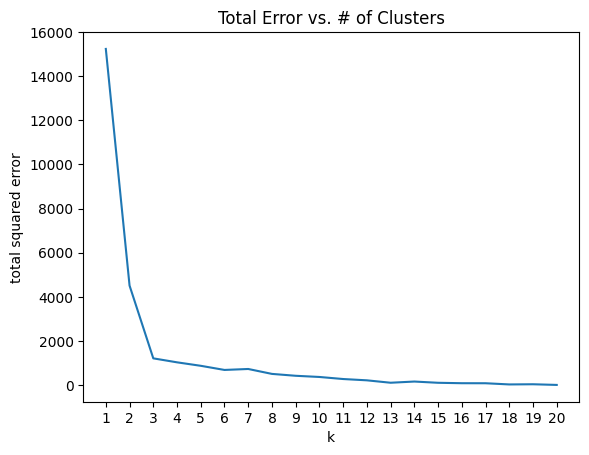

In [21]:
# agora plote os grupos de 1 até len(inputs)
ks = range(1, len(inputs) + 1)

errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('total squared error')
plt.title('Total Error vs. # of Clusters')
plt.show()

### Exemplo: Agrupando Cores

In [22]:
!pip install pillow

In [23]:
image_path = r'E:\Tiago\Documentos\849fe46d-d524-4441-842f-5a2e85b7cea9.JPG'

import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256

In [25]:
top_row = img[0]
top_left_pixel = top_row[0]

red, green, blue = top_left_pixel

In [26]:
# .tolist() converte um array NumPy em uma lista Python
pixels = [pixel.tolist() for row in img for pixel in row]

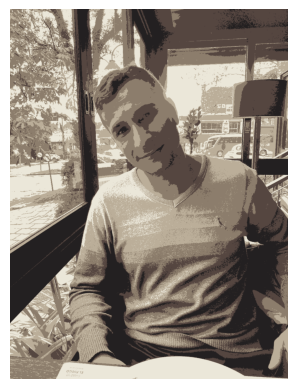

In [33]:
# clusterer = KMeans(k=5)
# clusterer.train(pixels)         # isso pode demorar um pouco

def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)         # índice do grupo mais próximo
    return clusterer.means[cluster]               # média do grupo mais próximo

new_img = [[recolor(pixel) for pixel in row]    # defina novamente a cor dessa linha de pixels
for row in img]                                 # para cada linha da imagem

plt.imshow(new_img)
plt.axis('off')
plt.show()

### Agrupamento Hierárquico

In [9]:
from typing import NamedTuple, Union, List

class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

In [10]:
class Merged(NamedTuple):
    children: tuple
    order: int

merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

In [11]:
# Função auxiliar para retornar todos os valores contidos em um grupo

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]
    
assert get_values(merged) == [[10, 20], [30, -15]]

In [12]:
from typing import Callable
from linear_algebra import distance

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    Compute todas as distâncias entre os pares cluster1 e cluster2
    e aplique a função de agregação _distance_agg_ à lista resultante
    """

    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])

def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')                         # Não foi mesclado
    else:
        return cluster.order

In [13]:
from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError('Leaf has no children')
    else:
        return cluster.children

In [15]:
def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # começe com todas as folhas
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)
    
    # enquanto ainda houver mais de um grupo...
    while len(clusters) > 1:
        # encontre os dois grupos mais próximos
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remova-os da lista de grupos
        clusters = [ c for c in clusters if c != c1 and c != c2]

        # mescle-os, usando o merge_order = n° de grupos restantes
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # adicione seus grupos meclados
        clusters.append(merged_cluster)
    
    # quando restar apenas um grupo, retorne-o
    return clusters[0]

base_cluster = bottom_up_cluster(inputs)

In [16]:
def generate_clusters(base_cluster: Cluster, num_clusters: int) -> List[Cluster]:
    # Comece com uma lista com apenas o grupo base
    clusters = [base_cluster]

    # enquanto não houver grupos suficientes...
    while len(clusters) < num_clusters:
        # escolha o último grupo a ser mesclado
        next_cluster = min(clusters, key=get_merge_order)
        # remova-o da lista
        clusters = [c for c in clusters if c != next_cluster]

        # e adicione seus filhos à lista (ou seja, desfaça sua mesclagem)
        clusters.extend(get_children(next_cluster))

    # quando houver grupos suficientes...
    return clusters

In [17]:
three_clusters = [get_values(cluster) for cluster in generate_clusters(base_cluster, 3)]

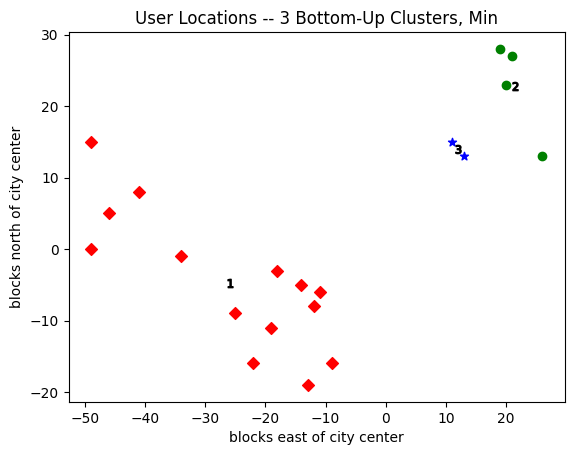

In [22]:
import matplotlib.pyplot as plt
from linear_algebra import vector_mean

for i, cluster, marker, color in zip([1, 2, 3], three_clusters, ['D', 'o', '*'], ['r', 'g', 'b']):
    xs, ys = zip(*cluster) # truque mágico de descompactação
    plt.scatter(xs, ys, color=color, marker=marker)

    # coloque um número na média do grupo
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")

plt.show()